In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report
from keras.layers.core import Activation
from keras import datasets
from scipy.misc import imresize
from keras.models import Model

Using TensorFlow backend.
C:\Users\anvee\anaconda3\envs\RecSys\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\anvee\anaconda3\envs\RecSys\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\anvee\anaconda3\envs\RecSys\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\anvee\anaconda3\envs\RecSys\lib\sit

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
y_true = y_test


In [3]:

img_row, img_cols = 28, 28
input_shape = (img_row, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_cols, img_row, 1)
x_test = x_test.reshape(x_test.shape[0], img_cols, img_row, 1)

print("Train set shape", x_train.shape, 'trainlabel shape', y_train.shape)
print('test set shape', x_test.shape, 'test labels:', y_test.shape)

Train set shape (60000, 28, 28, 1) trainlabel shape (60000,)
test set shape (10000, 28, 28, 1) test labels: (10000,)


In [4]:
# split the train set to validatation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)
print('Val_set shape:', x_val.shape, 'val_label shape:', y_val.shape)
print('Test_set shape:', x_test.shape, 'y_test shape:', y_test.shape)

X_train shape: (42000, 28, 28, 1) X_label shape: (42000,)
Val_set shape: (18000, 28, 28, 1) val_label shape: (18000,)
Test_set shape: (10000, 28, 28, 1) y_test shape: (10000,)


In [5]:

x_train = (x_train - x_train.mean()) / x_train.std()
x_val = (x_val - x_val.mean()) / x_val.std()
x_test = (x_test - x_test.mean()) / x_test.std()

In [6]:
num_labels = 10

im_row = 227
im_col = 227

def reformat(dataset):
    dataset = np.asarray([img_to_array(array_to_img(im, scale=False).resize((im_row, im_col))) for im in dataset])
    return dataset

y_train = keras.utils.to_categorical(y_train)
x_train  = reformat(x_train)
print('X_train shape:', x_train.shape, 'X_label shape:', y_train.shape)

y_test = keras.utils.to_categorical(y_test)
x_test  = reformat(x_test)
print('test set shape:', x_test.shape, 'test label shape', y_test.shape)

y_val = keras.utils.to_categorical(y_val)
x_val  = reformat(x_val)
print('val set shape:', x_val.shape, 'val_lavels shape:', y_val.shape)

X_train shape: (42000, 227, 227, 1) X_label shape: (42000, 10)
test set shape: (10000, 227, 227, 1) test label shape (10000, 10)
val set shape: (18000, 227, 227, 1) val_lavels shape: (18000, 10)


In [7]:
num_classes=10

In [8]:
model2 = Sequential()

# 1st Convolutional Layer
model2.add(Conv2D(filters=96, input_shape=(227,227,1), kernel_size=(11, 11), strides=(4, 4), activation='tanh'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 2nd Convolutional Layer
model2.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='tanh'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# 3rd Convolutional Layer
model2.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='tanh'))

# 4th Convolutional Layer
model2.add(Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1), activation='tanh'))

# 5th Convolutional Layer
model2.add(Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='tanh'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# Passing it to a Fully Connected layer
model2.add(Flatten())

# 1st Fully Connected Layer
model2.add(Dense(4096, activation='tanh'))

# Add Dropout to prevent overfitting
model2.add(Dropout(0.4))

# 2nd Fully Connected Layer
model2.add(Dense(4096, activation='tanh'))

# Add Dropout
model2.add(Dropout(0.4))

# 3rd Fully Connected Layer
model2.add(Dense(1000, activation='tanh'))


# Output Layer
model2.add(Dense(num_classes, activation='softmax'))


In [10]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        11712     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 384)         885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 384)         1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 5, 256)        

In [14]:
# Compile the model
from keras.optimizers import RMSprop
opt = RMSprop(lr=0.0001)
model2.compile(loss=keras.losses.kullback_leibler_divergence, optimizer=opt, metrics=['accuracy'])

In [15]:
hist = model2.fit(x_train, y_train, batch_size= 45, epochs= 25, verbose=1, validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 123s 3ms/step - loss: 0.2750 - accuracy: 0.9178 - val_loss: 0.3110 - val_accuracy: 0.9158
Epoch 2/25
42000/42000 [==============================] - 117s 3ms/step - loss: 0.1323 - accuracy: 0.9639 - val_loss: 0.1333 - val_accuracy: 0.9662
Epoch 3/25
42000/42000 [==============================] - 116s 3ms/step - loss: 0.0863 - accuracy: 0.9757 - val_loss: 0.1050 - val_accuracy: 0.9730os - ETA: 1s - loss: 0.0
Epoch 4/25
42000/42000 [==============================] - 159s 4ms/step - loss: 0.0581 - accuracy: 0.9826 - val_loss: 0.0815 - val_accuracy: 0.9805
Epoch 5/25
42000/42000 [==============================] - 167s 4ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.0961 - val_accuracy: 0.9771
Epoch 6/25
42000/42000 [==============================] - 171s 4ms/step - loss: 0.0352 - ac

In [17]:
score = model2.evaluate(x_test, y_test, verbose= 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.07243863691592686
Test accuracy: 0.9890000224113464


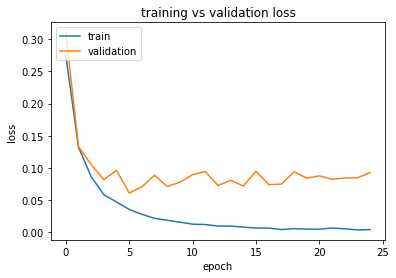

In [18]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("training vs validation loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

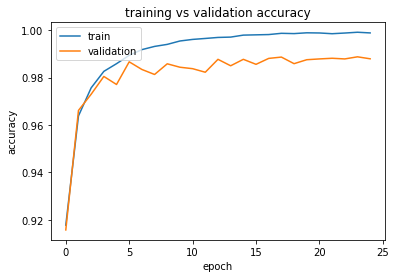

In [19]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("training vs validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="upper left")
plt.show()

In [20]:
#get the predictions for the test data
predicted_classes = model2.predict_classes(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,f1_score
target_names = ["Class {}".format(i) for i in range(num_classes)]
print('Confusion Matrix is given by:\n')
print(confusion_matrix(y_true, predicted_classes))

Confusion Matrix is given by:

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1129    1    4    0    0    0    1    0    0]
 [   2    0 1028    0    0    0    0    2    0    0]
 [   0    0    2 1003    0    1    0    2    1    1]
 [   0    0    1    0  976    0    1    0    0    4]
 [   1    0    0   10    0  876    3    0    1    1]
 [   7    2    0    1    1    4  942    0    1    0]
 [   1    3   11    0    0    0    0 1012    0    1]
 [   1    0    2    1    1    0    0    4  964    1]
 [   2    2    0    4    7    6    0    2    4  982]]


In [22]:
print('F1-score: {:.2f}\n'.format(f1_score(y_true, predicted_classes,average='micro')))

F1-score: 0.99



In [23]:
print(classification_report(y_true,predicted_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

